# Decision Trees - Gini index

In [ ]:
# https://www.upgrad.com/blog/gini-index-for-decision-trees/

Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one. The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.


$$ Gini = \Sigma_{i=1}^C p(i) * (1-p(i)), $$ 

where <em>p(i)</em> is probability of each class <em>C</em>.

The Gini Index works on categorical variables and gives the results in terms of “success” or “failure” and hence performs only binary split.

It favours mostly the larger partitions. 

## Gini index calcualtion example

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
# red class a 
x_a = [90, 110, 115, 120, 160, 170]
y_a = [205, 190,230, 370, 300, 95 ]
# blue class b 
x_b = [230, 260, 310, 360,  390]
y_b = [280, 230, 101, 99, 160]

Text(0, 0.5, 'Y')

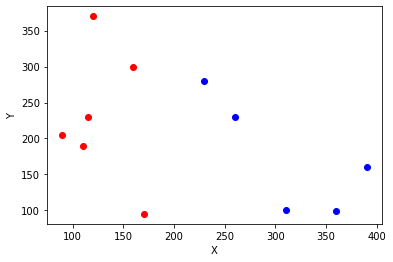

In [93]:
plt.plot(x_a, y_a, 'ro')
plt.plot(x_b, y_b, 'bo')
plt.xlabel('X')
plt.ylabel('Y')

For a decision tree, we need to split the dataset into two branches. 

Consider the data points with 5 Reds and 5 Blues marked on the X-Y plane. Suppose we make a binary split at treshold X=200, then we will have a perfect split as shown below.

In [94]:
# Gini impurity 
# C classes 
# p(i) ... probability of picking the data point with the class i. 

# Randomly  pick up any data point from the dataset
# G = p(1) ∗ (1−p(1)) + p(2) ∗ (1−p(2))
G = (0.5 * (1 - 0.5)) + (0.5 * (1 - 0.5))
print(' Gini index for random selection of a point is {}'.format(G))

 Gini index for random selection of a point is 0.5


Text(0, 0.5, 'Y')

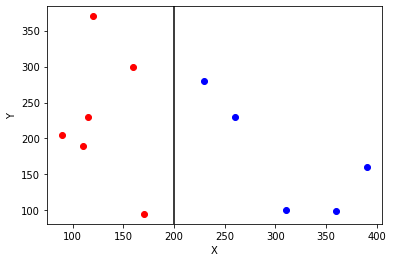

In [95]:
thr_split = 200
plt.plot(x_a, y_a, 'ro')
plt.plot(x_b, y_b, 'bo')
plt.axvline(x = thr_split, color='k')
plt.xlabel('X')
plt.ylabel('Y')

In [96]:
print('Threshold is 200')
G_left = (1 * (1 - 1)) + (0 * (1 - 0))
G_right = (0 * (1 - 1)) + (0 * (1 - 0))
print('Gini index for left branch (red) has Gini = {}'.format(G_left))
print('Gini index for right branch (blue) has Gini = {}'.format(G_right))

Threshold is 200
Gini index for left branch (red) has Gini = 0
Gini index for right branch (blue) has Gini = 0


Both the left and right branches of our perfect split have probabilities of 0 and hence is indeed perfect. A Gini Impurity of 0 is the lowest and the best possible impurity for any data set.

Text(0, 0.5, 'Y')

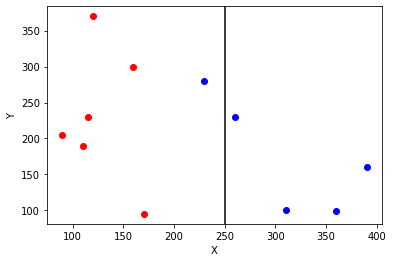

In [97]:
plt.plot(x_a, y_a, 'ro')
plt.plot(x_b, y_b, 'bo')
plt.axvline(x = 250, color='k')
plt.xlabel('X')
plt.ylabel('Y')

In [98]:
# left branch has 5 reds and 1 blue 
G_left2 = (1/6 * (1 - 1/6)) + (5/6 * (1 - 5/6))

# the right branch has all blues 
G_right2 = (1 * (1-1)) + (0 * (1-0))

print('Gini index for left branch (red) has Gini = {}'.format(round(G_left2,3)))
print('Gini index for right branch (blue) has Gini = {}'.format(G_right2))

Gini index for left branch (red) has Gini = 0.278
Gini index for right branch (blue) has Gini = 0


We have the Gini Impurities of the imperfect split, in order to evaluate the quality or extent of the split, we will give a specific weight to the impurity of each branch with the number of elements it has.

In [99]:
# quality of a split 
a_weight = sum([(i < thr_split)*1 for i in x_a]) / 10
b_weight = sum([(i > thr_split)*1 for i in x_b]) / 10

Gini_index = (a_weight * G_left2) + (b_weight * G_right2)
print('Gini index: {}'.format(round(Gini_index, 3)))

Gini index: 0.167


Now, we shall calculate the value of Gini Gain and analyse its application in Decision Trees. The amount of impurity removed with this split is calculated by deducting the above value  with the Gini Index for the entire dataset (0.5)


In [100]:
Gini_gain = G - Gini_index
print('Gini Gain for the split is: {}'.format(round(Gini_gain, 3)))

Gini Gain for the split is: 0.333


Higher Gini Gain => Better Split. 

In a Decision Tree algorithm, the best split is obtained by maximizing the Gini Gain, which is calculated in the above manner with each iteration. 

After calculating the Gini Gain for each attribute in the data set, the class, will choose the largest Gini Gain as the Root Node. When a branch with Gini of 0 is encountered it becomes the leaf node and the other branches with Gini more than 0 need further splitting. These nodes are grown recursively till all of them are classified.